In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import math
import sklearn

df = pd.read_csv("//Users/owner/ITCS_3162/ITCS3162/Project2/Heart_Disease_Prediction.csv")

**Drop Columns**

In [21]:
df.drop('EKG results', axis = 1, inplace = True)
df.drop('ST depression', axis = 1, inplace = True)
df.drop('Slope of ST', axis = 1, inplace = True)
df.drop('Number of vessels fluro', axis = 1, inplace = True)
df.drop('Thallium', axis = 1, inplace = True)
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,Heart Disease
0,0,70,1,4,130,322,0,109,0,Presence
1,1,67,0,3,115,564,0,160,0,Absence
2,2,57,1,2,124,261,0,141,0,Presence
3,3,64,1,4,128,263,0,105,1,Absence
4,4,74,0,2,120,269,0,121,1,Absence


**Changed the Heart Disease Column to numerical values to see if there is a coorelation between other vriables**


**Convert Presence and absence to 1 and 0 to show in df.describe and heatmap**

In [22]:
df["Heart Disease"] = df["Heart Disease"].replace("Absence", 0)
df["Heart Disease"] = df["Heart Disease"].replace("Presence", 1)
df

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,Heart Disease
0,0,70,1,4,130,322,0,109,0,1
1,1,67,0,3,115,564,0,160,0,0
2,2,57,1,2,124,261,0,141,0,1
3,3,64,1,4,128,263,0,105,1,0
4,4,74,0,2,120,269,0,121,1,0
...,...,...,...,...,...,...,...,...,...,...
265,265,52,1,3,172,199,1,162,0,0
266,266,44,1,2,120,263,0,173,0,0
267,267,56,0,2,140,294,0,153,0,0
268,268,57,1,4,140,192,0,148,0,0


In [23]:

df.describe()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,134.500000,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,149.677778,0.329630,0.444444
std,78.086491,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,23.165717,0.470952,0.497827
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,67.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,133.000000,0.000000,0.000000
50%,134.500000,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,153.500000,0.000000,0.000000
75%,201.750000,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,166.000000,1.000000,1.000000
max,269.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,202.000000,1.000000,1.000000


In [24]:
males = df[df.Sex == 1]
print(males)
females = df[df.Sex == 0]
print(females)


     index  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  Max HR  \
0        0   70    1                4  130          322             0     109   
2        2   57    1                2  124          261             0     141   
3        3   64    1                4  128          263             0     105   
5        5   65    1                4  120          177             0     140   
6        6   56    1                3  130          256             1     142   
..     ...  ...  ...              ...  ...          ...           ...     ...   
264    264   48    1                2  110          229             0     168   
265    265   52    1                3  172          199             1     162   
266    266   44    1                2  120          263             0     173   
268    268   57    1                4  140          192             0     148   
269    269   67    1                4  160          286             0     108   

     Exercise angina  Heart

**Looking at the data there are 183 males in this dataset and only 87 females**

<Axes: >

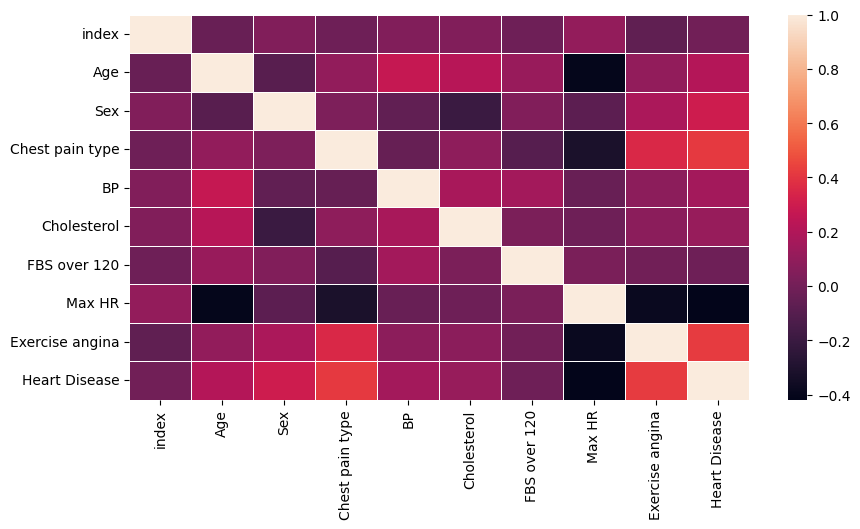

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=False,linewidth = 0.5)

/Users/owner/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


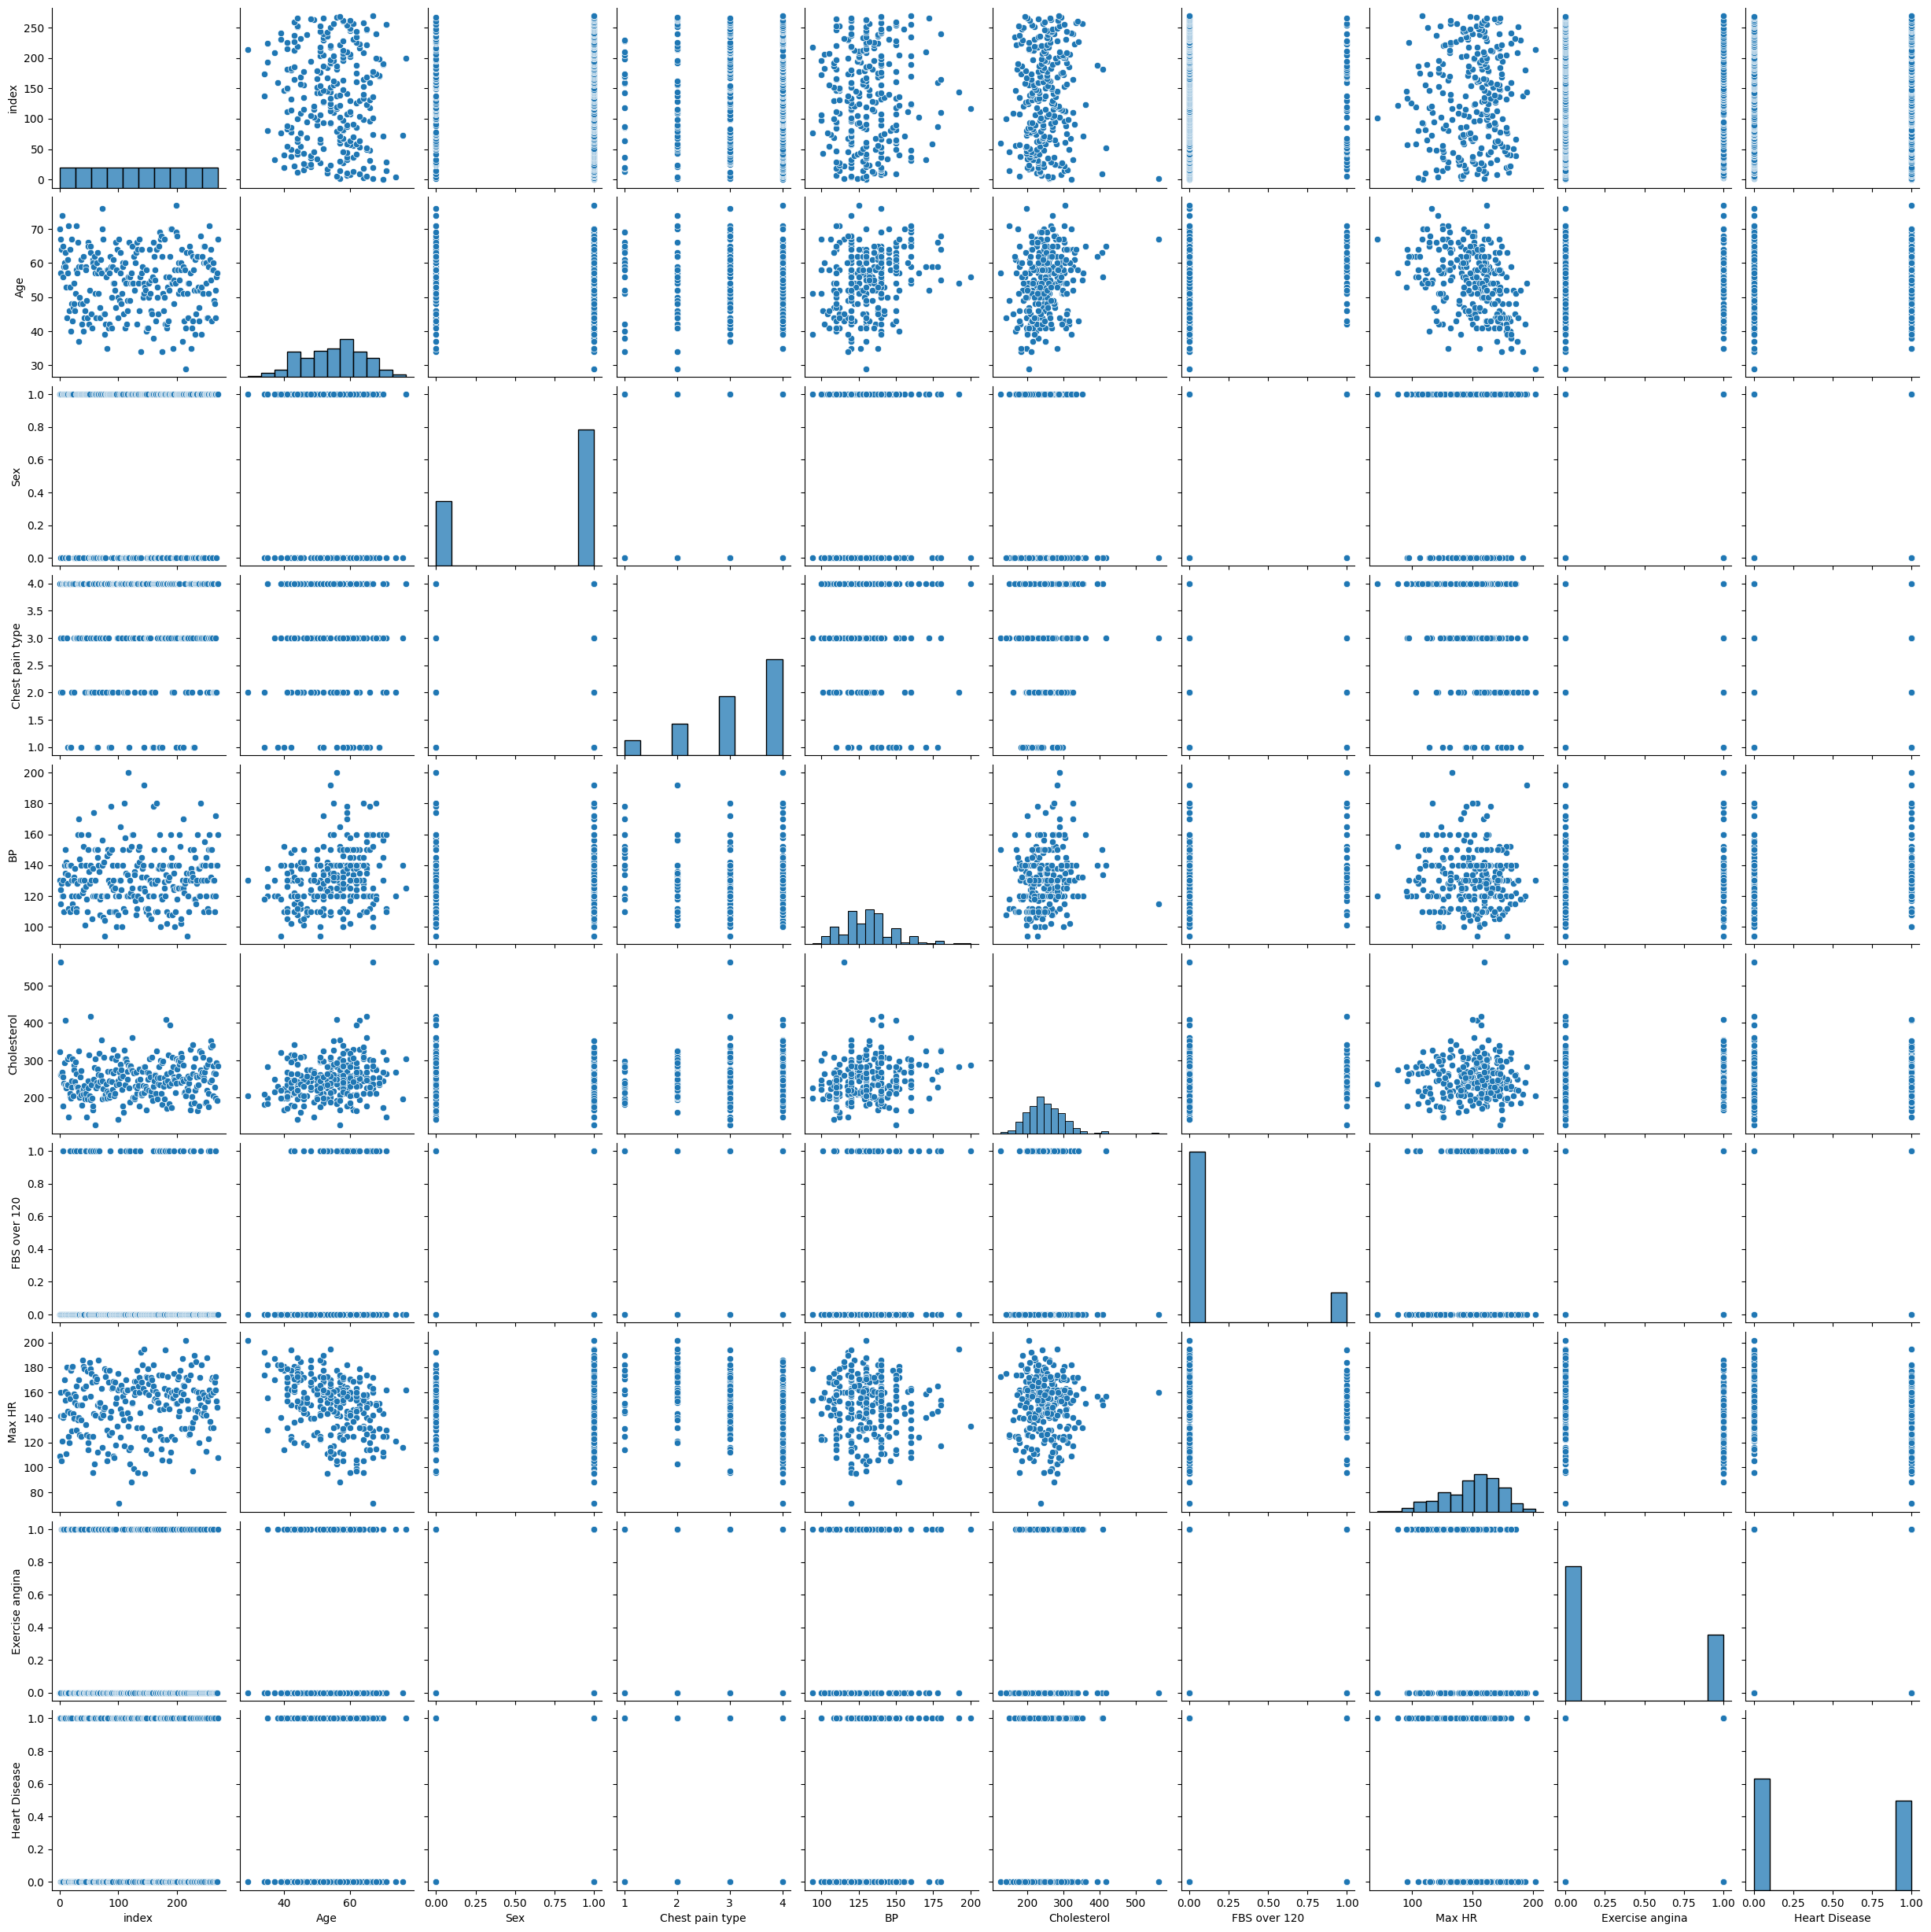

In [26]:
sns.pairplot(data=df)

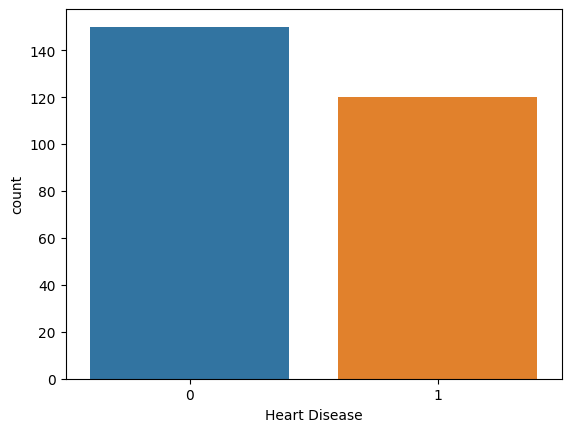

In [27]:
heartDisease = ['Heart Disease']
num_col = ['FBS over 120']
    
for column in heartDisease:
    sns.countplot(data = df, x = column) 
plt.show()

**Modeling**

Decision Tree

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


Accuracy: 0.6296296296296297
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.72      0.68        29
           1       0.62      0.52      0.57        25

    accuracy                           0.63        54
   macro avg       0.63      0.62      0.62        54
weighted avg       0.63      0.63      0.63        54

Score: 


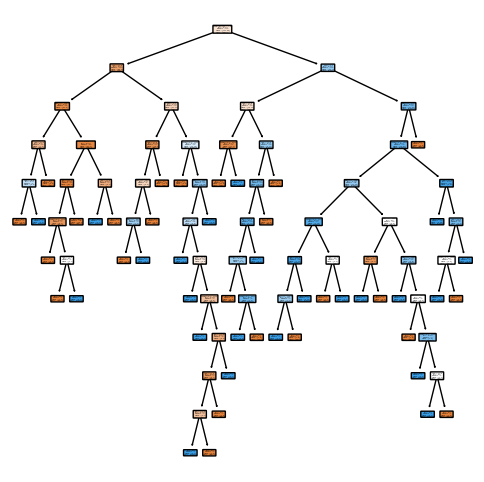

In [61]:
df = pd.read_csv("//Users/owner/ITCS_3162/ITCS3162/Project2/Heart_Disease_Prediction.csv")
df["Heart Disease"] = df["Heart Disease"].replace("Absence", 0)
df["Heart Disease"] = df["Heart Disease"].replace("Presence", 1)
X=df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR', 'Exercise angina']]
y = df['Heart Disease']
#train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#createdecision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the model
dt_classifier.fit(X_train, y_train)
#Predicitions
y_pred = dt_classifier.predict(X_test)
#Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

#Make the tree figure
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
#predicted array 
predicted
print("Score: ")
clf.score(X_test, y_test)
#figure
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(6, 6)) 
plot_tree(
    dt_classifier, 
    feature_names=X.columns.tolist(),  
    class_names=["Absence", "Presence"], 
    filled=True, 
    rounded=True
)
plt.show()


Random forest model

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [34]:
df = pd.read_csv("//Users/owner/ITCS_3162/ITCS3162/Project2/Heart_Disease_Prediction.csv")
df["Heart Disease"] = df["Heart Disease"].replace("Absence", 0)
df["Heart Disease"] = df["Heart Disease"].replace("Presence", 1)
X=df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR', 'Exercise angina']]
y = df['Heart Disease']
#train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#create random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=270)
#train model
rf_classifier.fit(X_train, y_train)
#prediction
y_pred = rf_classifier.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)



Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.71      0.68      0.69        25

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54

